In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '5a4a1b93-706b-4d0d-ab83-70a9f8fba164',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2023-08-17T11:21:55.867Z', 'error_code': 0, 'error_message': None, 'elapsed': 25, 'credit_count': 1, 'notice': None, 'total_count': 9596}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10392, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [2]:
type(data)

dict

In [3]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df = pd.json_normalize(data['data'])
df["timestamp"] = pd.to_datetime("now")
df

C:\Users\sulta\AppData\Local\Temp\ipykernel_13080\1041334318.py:5: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df["timestamp"] = pd.to_datetime("now")


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10392,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.945996e+07,1.945996e+07,False,NaN,1,NaN,NaN,None,2023-08-17T11:20:00.000Z,28475.988276,1.663565e+10,22.5916,-0.314017,-2.299559,-3.504124,-5.155265,7.507298,6.200143,5.541415e+11,49.0534,5.979958e+11,None,2023-08-17T11:20:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-17 11:22:04.140548
1,1027,Ethereum,ETH,ethereum,7236,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.201359e+08,1.201359e+08,True,NaN,2,NaN,NaN,None,2023-08-17T11:20:00.000Z,1783.939388,5.765582e+09,20.5398,-0.359155,-2.199920,-3.675072,-6.390728,3.019842,-1.260184,2.143151e+11,18.9707,2.143151e+11,None,2023-08-17T11:20:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-17 11:22:04.140548
2,825,Tether USDt,USDT,tether,59565,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.301725e+10,8.668426e+10,True,NaN,3,NaN,NaN,None,2023-08-17T11:20:00.000Z,0.998722,2.586452e+10,10.9605,-0.011884,-0.022048,-0.032632,-0.136233,-0.144249,-0.149051,8.291114e+10,7.3394,8.657347e+10,None,2023-08-17T11:20:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-08-17 11:22:04.140548
3,1839,BNB,BNB,bnb,1571,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.538523e+08,1.538523e+08,False,NaN,4,NaN,NaN,None,2023-08-17T11:20:00.000Z,230.366206,4.957387e+08,-3.0275,-0.171730,-1.758843,-4.767545,-4.645223,-6.700684,-25.485547,3.544238e+10,3.1373,3.544238e+10,None,2023-08-17T11:20:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-17 11:22:04.140548
4,52,XRP,XRP,xrp,1030,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.284187e+10,9.998850e+10,False,NaN,5,NaN,NaN,None,2023-08-17T11:20:00.000Z,0.584489,1.455288e+09,-7.6186,-0.098816,-2.603272,-7.310012,-22.738348,19.893348,25.697656,3.088549e+10,2.7339,5.844890e+10,None,2023-08-17T11:20:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-17 11:22:04.140548
5,3408,USD Coin,USDC,usd-coin,13638,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.602843e+10,2.602843e+10,False,NaN,6,NaN,NaN,None,2023-08-17T11:20:00.000Z,0.999954,3.660113e+09,24.1968,-0.009424,-0.022738,-0.009336,-0.002279,-0.049842,-0.006157,2.602724e+10,2.3033,2.602724e+10,None,2023-08-17T11:20:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-08-17 11:22:04.140548
6,2010,Cardano,ADA,cardano,890,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.504377e+10,3.607655e+10,False,NaN,7,NaN,NaN,None,2023-08-17T11:20:00.000Z,0.275039,2.450423e+08,15.9365,-0.306817,-1.287049,-7.741204,-10.670355,3.078881,-25.481545,9.638409e+09,0.8530,1.237676e+10,None,2023-08-17T11:20:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-17 11:22:04.140548
7,74,Dogecoin,DOGE,dogecoin,767,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.406254e+11,1.406254e+11,True,NaN,8,NaN,NaN,None,2023-08-17T11:20:00.000Z,0.067001,4.333907e+08,-0.6930,-0.691381,-4.657942,-11.153094,-2.959517,7.685943,-8.779829,9.421995e+09,0.8340,9.421995e+09,None,2023-08-17T11:20:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-17 11:22:04.140548
8,5426,Solana,SOL,solana,498,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdi

In [ ]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '5a4a1b93-706b-4d0d-ab83-70a9f8fba164',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    df = pd.json_normalize(data['data'])
    df["timestamp"] = pd.to_datetime("now")
    df
    
    if not os.path.isfile(r"Downloads\API.csv"):
        df.to_csv(r"Downloads\API.csv",header = "columns_name")
    else:
        df.to_csv(r"Downloads\API.csv", mode = "a", header = False)

In [ ]:
import os
from time import time
from time import sleep

for i in range(101):
    api_runner()
    print("API Runner Completed Successfully")
    sleep(60)
exit()    

In [18]:
df72 = pd.read_csv(r"Downloads\API.csv")
df72

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10392,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19459956.00000,19459956.00000,False,NaN,1,NaN,NaN,NaN,2023-08-17T11:17:00.000Z,28462.35046,16605369908.94370,22.01830,-0.36143,-2.34018,-3.56253,-5.15883,7.44777,6.11445,553876087659.19739,49.01350,597709359715.06006,NaN,2023-08-17T11:17:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-17 11:18:50.006920
1,1,1027,Ethereum,ETH,ethereum,7236,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120135854.32245,120135854.32245,True,NaN,2,NaN,NaN,NaN,2023-08-17T11:17:00.000Z,1783.31267,5751246666.32398,19.48200,-0.41074,-2.23265,-3.70714,-6.39998,3.00439,-1.30734,214239790745.75443,18.96400,214239790745.75000,NaN,2023-08-17T11:17:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-17 11:18:50.006920
2,2,825,Tether USDt,USDT,tether,59565,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,83017245694.10722,86684257831.21764,True,NaN,3,NaN,NaN,NaN,2023-08-17T11:17:00.000Z,0.99884,25820931074.22662,10.34820,-0.01605,-0.01466,-0.01190,-0.13653,-0.11171,-0.13142,82920944981.83986,7.33620,86583703353.63000,NaN,2023-08-17T11:17:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-08-17 11:18:50.006920
3,3,1839,BNB,BNB,bnb,1571,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,153852330.46827,153852330.46827,False,NaN,4,NaN,NaN,NaN,2023-08-17T11:17:00.000Z,230.26643,494876215.55086,-3.42300,-0.22609,-1.78343,-4.81945,-4.70575,-6.77582,-25.50584,35427027535.93624,3.13590,35427027535.94000,NaN,2023-08-17T11:17:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-17 11:18:50.006920
4,4,52,XRP,XRP,xrp,1030,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,52841868422.00000,99988501123.00000,False,NaN,5,NaN,NaN,NaN,2023-08-17T11:17:00.000Z,0.58402,1455626261.94418,-7.63350,-0.15843,-2.66135,-7.34254,-22.68158,19.81428,25.65822,30860569928.44095,2.72950,58401738715.95000,NaN,2023-08-17T11:17:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-17 11:18:50.006920
5,5,3408,USD Coin,USDC,usd-coin,13638,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,26028431009.79289,26028431009.79289,False,NaN,6,NaN,NaN,NaN,2023-08-17T11:17:00.000Z,1.00006,3655956277.21113,24.11360,-0.02044,-0.01907,0.00923,0.00536,-0.01462,0.00276,26030015807.86111,2.30360,26030015807.86000,NaN,2023-08-17T11:17:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-08-17 11:18:50.006920
6,6,2010,Cardano,ADA,cardano,890,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",45000000000.00000,35043771892.41300,36076551300.29000,False,NaN,7,NaN,NaN,NaN,2023-08-17T11:17:00.000Z,0.27511,244764975.38457,14.89440,-0.25367,-1.29215,-7.74270,-10.63411,3.16705,-25.44791,9640783270.72985,0.85330,12379810270.27000,NaN,2023-08-17T11:17:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-17 11:18:50.006920
7,7,74,Dogecoin,DOGE,dogecoin,767,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,140625386383.70520,140625386383.70520,True,NaN,8,NaN,NaN,NaN,2023-08-17T11:17:00.000Z,0.06697,431637738.93592,-1.23430,-0.64973,-4.64239,-11.20788,-3.02292,7.66282,-8.79793,9418121038.07706,0.83340,9418121038.08000,NaN,2

In [10]:
pd.set_option("display.float_format", lambda x: "%.5f" % x)

In [19]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10392,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19459956.00000,19459956.00000,False,NaN,1,NaN,NaN,None,2023-08-17T11:22:00.000Z,28491.01536,16637420472.56565,22.55150,-0.26672,-2.25394,-3.43207,-5.22175,7.58366,6.19940,554433905309.23767,49.07930,598311322568.96997,None,2023-08-17T11:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-17 11:24:12.284470
1,1027,Ethereum,ETH,ethereum,7236,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120135854.32245,120135854.32245,True,NaN,2,NaN,NaN,None,2023-08-17T11:22:00.000Z,1784.86553,5775265292.50305,20.61760,-0.31142,-2.14641,-3.56996,-6.43750,3.10178,-1.27621,214426345047.36374,18.98050,214426345047.35999,None,2023-08-17T11:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-17 11:24:12.284470
2,825,Tether USDt,USDT,tether,59565,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,83017245694.10722,86684257831.21764,True,NaN,3,NaN,NaN,None,2023-08-17T11:22:00.000Z,0.99864,25884559685.67498,11.01530,-0.01159,-0.02402,-0.03931,-0.19448,-0.14555,-0.15343,82904464782.50130,7.33880,86566495196.02000,None,2023-08-17T11:22:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-08-17 11:24:12.284470
3,1839,BNB,BNB,bnb,1571,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,153852330.46827,153852330.46827,False,NaN,4,NaN,NaN,None,2023-08-17T11:22:00.000Z,230.61825,496133129.42948,-3.11280,-0.05858,-1.67195,-4.65553,-4.56964,-6.49813,-25.41869,35481154516.46452,3.14070,35481154516.46000,None,2023-08-17T11:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-17 11:24:12.284470
4,52,XRP,XRP,xrp,1030,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,52841868422.00000,99988501123.00000,False,NaN,5,NaN,NaN,None,2023-08-17T11:22:00.000Z,0.58484,1455343614.60597,-7.63520,-0.05725,-2.56906,-7.19051,-22.99218,20.04439,25.64173,30904266713.92506,2.73560,58484432206.52000,None,2023-08-17T11:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-17 11:24:12.284470
5,3408,USD Coin,USDC,usd-coin,13638,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,26028431009.79289,26028431009.79289,False,NaN,6,NaN,NaN,None,2023-08-17T11:22:00.000Z,0.99993,3661746042.07095,24.38730,-0.00474,-0.01909,-0.01750,-0.00859,-0.04533,-0.00673,26026629200.19095,2.30360,26026629200.19000,None,2023-08-17T11:22:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-08-17 11:24:12.284470
6,2010,Cardano,ADA,cardano,890,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,35043771892.41300,36076551300.29000,False,NaN,7,NaN,NaN,None,2023-08-17T11:22:00.000Z,0.27523,245160189.57225,16.02480,-0.21066,-1.19335,-7.64381,-10.68129,3.23480,-25.45839,9645109366.49528,0.85350,12385365445.96000,None,2023-08-17T11:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-17 11:24:12.284470
7,74,Dogecoin,DOGE,dogecoin,767,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,140625386383.70520,140625386383.70520,True,NaN,8,NaN,NaN,None,2023-08-17T11:22:00.000Z,0.06709,433968435.18341,-0.58930,-0.45728,-4.52726,-11.01122,-2.84371,7.85211,-8.69587,9435119971.15952,0.83520,9435119971.16000,None,2023-08-1

In [20]:
df3 = df.groupby("name", sort = False)[["quote.USD.percent_change_1h","quote.USD.percent_change_24h","quote.USD.percent_change_7d"]].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d
name,,,
Bitcoin,-0.26672,-2.25394,-3.43207
Ethereum,-0.31142,-2.14641,-3.56996
Tether USDt,-0.01159,-0.02402,-0.03931
BNB,-0.05858,-1.67195,-4.65553
XRP,-0.05725,-2.56906,-7.19051
USD Coin,-0.00474,-0.01909,-0.01750
Cardano,-0.21066,-1.19335,-7.64381
Dogecoin,-0.45728,-4.52726,-11.01122
Solana,-0.43447,-2.03863,-5.60877


In [21]:
df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h     -0.26672
             quote.USD.percent_change_24h    -2.25394
             quote.USD.percent_change_7d     -3.43207
Ethereum     quote.USD.percent_change_1h     -0.31142
             quote.USD.percent_change_24h    -2.14641
             quote.USD.percent_change_7d     -3.56996
Tether USDt  quote.USD.percent_change_1h     -0.01159
             quote.USD.percent_change_24h    -0.02402
             quote.USD.percent_change_7d     -0.03931
BNB          quote.USD.percent_change_1h     -0.05858
             quote.USD.percent_change_24h    -1.67195
             quote.USD.percent_change_7d     -4.65553
XRP          quote.USD.percent_change_1h     -0.05725
             quote.USD.percent_change_24h    -2.56906
             quote.USD.percent_change_7d     -7.19051
USD Coin     quote.USD.percent_change_1h     -0.00474
             quote.USD.percent_change_24h    -0.01909
             quote.USD.percent_change_7d

In [22]:
type(df4)

pandas.core.series.Series

In [23]:
df5 = df4.to_frame(name = "values")
df5

values
name                                              
Bitcoin     quote.USD.percent_change_1h   -0.26672
            quote.USD.percent_change_24h  -2.25394
            quote.USD.percent_change_7d   -3.43207
Ethereum    quote.USD.percent_change_1h   -0.31142
            quote.USD.percent_change_24h  -2.14641
            quote.USD.percent_change_7d   -3.56996
Tether USDt quote.USD.percent_change_1h   -0.01159
            quote.USD.percent_change_24h  -0.02402
            quote.USD.percent_change_7d   -0.03931
BNB         quote.USD.percent_change_1h   -0.05858
            quote.USD.percent_change_24h  -1.67195
            quote.USD.percent_change_7d   -4.65553
XRP         quote.USD.percent_change_1h   -0.05725
            quote.USD.percent_change_24h  -2.56906
            quote.USD.percent_change_7d   -7.19051
USD Coin    quote.USD.percent_change_1h   -0.00474
            quote.USD.percent_change_24h  -0.01909
            quote.USD.percent_change_7d   -0.01750
Cardano     quote.USD.percent_change_1h   -0.21066
            quote.USD.percent_change_24h  -1.19335
            quote.USD.percent_change_7d   -7.64381
Dogecoin    quote.USD.percent_change_1h   -0.45728
            quote.USD.percent_change_24h  -4.52726
            quote.USD.percent_change_7d  -11.01122
Solana      quote.USD.percent_change_1h   -0.43447
            quote.USD.percent_change_24h  -2.03863
            quote.USD.percent_change_7d   -5.60877
TRON        quote.USD.percent_change_1h    0.00287
            quote.USD.percent_change_24h  -1.85775
            quote.USD.percent_change_7d   -3.13190
Polkadot    quote.USD.percent_change_1h   -0.06089
            quote.USD.percent_change_24h  -0.10418
            quote.USD.percent_change_7d   -4.71897
Polygon     quote.USD.percent_change_1h   -0.79256
            quote.USD.percent_change_24h  -2.38911
            quote.USD.percent_change_7d  -11.68364
Litecoin    quote.USD.percent_change_1h   -0.05518
            quote.USD.percent_change_24h  -4.85692
            quote.USD.percent_change_7d  -10.28978
Dai         quote.USD.percent_change_1h   -0.02661
            quote.USD.percent_change_24h  -0.05274
            quote.USD.percent_change_7d   -0.07889
Shiba Inu   quote.USD.percent_change_1h   -1.85781
            quote.USD.percent_change_24h  -9.62939
            quote.USD.percent_change_7d   -9.05406

In [24]:
type(df5)

pandas.core.frame.DataFrame

In [25]:
df5.count()

values    45
dtype: int64

In [51]:
index = pd.Index(range(45))
df6 = df5.set_index(index)
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.26672
1,Bitcoin,quote.USD.percent_change_24h,-2.25394
2,Bitcoin,quote.USD.percent_change_7d,-3.43207
3,Ethereum,quote.USD.percent_change_1h,-0.31142
4,Ethereum,quote.USD.percent_change_24h,-2.14641
5,Ethereum,quote.USD.percent_change_7d,-3.56996
6,Tether USDt,quote.USD.percent_change_1h,-0.01159
7,Tether USDt,quote.USD.percent_change_24h,-0.02402
8,Tether USDt,quote.USD.percent_change_7d,-0.03931
9,BNB,quote.USD.percent_change_1h,-0.05858


In [52]:
df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.26672
1,Bitcoin,quote.USD.percent_change_24h,-2.25394
2,Bitcoin,quote.USD.percent_change_7d,-3.43207
3,Ethereum,quote.USD.percent_change_1h,-0.31142
4,Ethereum,quote.USD.percent_change_24h,-2.14641
5,Ethereum,quote.USD.percent_change_7d,-3.56996
6,Tether USDt,quote.USD.percent_change_1h,-0.01159
7,Tether USDt,quote.USD.percent_change_24h,-0.02402
8,Tether USDt,quote.USD.percent_change_7d,-0.03931
9,BNB,quote.USD.percent_change_1h,-0.05858


In [38]:
df7 = df6.rename(columns = {"level_1" : "percent_change"})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.26672
1,Bitcoin,quote.USD.percent_change_24h,-2.25394
2,Bitcoin,quote.USD.percent_change_7d,-3.43207
3,Ethereum,quote.USD.percent_change_1h,-0.31142
4,Ethereum,quote.USD.percent_change_24h,-2.14641
5,Ethereum,quote.USD.percent_change_7d,-3.56996
6,Tether USDt,quote.USD.percent_change_1h,-0.01159
7,Tether USDt,quote.USD.percent_change_24h,-0.02402
8,Tether USDt,quote.USD.percent_change_7d,-0.03931
9,BNB,quote.USD.percent_change_1h,-0.05858


In [44]:
df7["percent_change"] = df7["percent_change"].replace(["quote.USD.percent_change_1h","quote.USD.percent_change_24h","quote.USD.percent_change_7d"],["1h","24h","7h"])
df7

,name,percent_change,values
0,Bitcoin,1h,-0.26672
1,Bitcoin,24h,-2.25394
2,Bitcoin,7h,-3.43207
3,Ethereum,1h,-0.31142
4,Ethereum,24h,-2.14641
5,Ethereum,7h,-3.56996
6,Tether USDt,1h,-0.01159
7,Tether USDt,24h,-0.02402
8,Tether USDt,7h,-0.03931
9,BNB,1h,-0.05858


In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

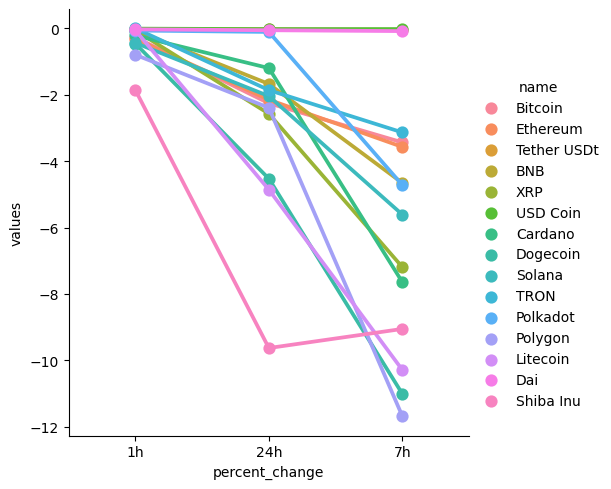

In [46]:
sns.catplot(x = "percent_change", y = "values", hue = "name", data = df7, kind = "point")

In [47]:
df10 = df[["name","quote.USD.price","timestamp"]]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,28491.01536,2023-08-17 11:24:12.284470


In [49]:
sns.set_theme(style = "darkgrid")

<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

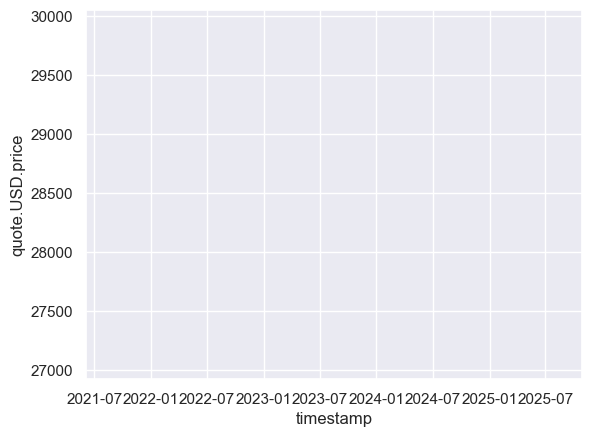

In [53]:
sns.lineplot(x = "timestamp", y = "quote.USD.price", data = df10)